# Cats And Dogs Image Classification Using Convolutional Neural Networks

# The Data

Acknowledgements : The dataset was downloaded from Kaggle and has two folders which are Cats and Dogs which are also the classes based upon which the images will be classified.

### Visualizing the data

In [1]:
#Importing the relevant libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
#Loading the dataset
data_dir = 'C:\\Users\\Admin\\Downloads\\dataset'

In [3]:
# The dataset has two folders which is the train and test. The model will be trained on the images in the train folder and will
#later be tested using the images in the test folder.
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir+'\\test\\'

In [5]:
train_path = data_dir+'\\train\\'

In [6]:
test_path

'C:\\Users\\Admin\\Downloads\\dataset\\test\\'

In [7]:
train_path

'C:\\Users\\Admin\\Downloads\\dataset\\train\\'

In [8]:
os.listdir(train_path)

['cats', 'dogs']

In [9]:
os.listdir(train_path+'cats')[0]

'cat.1.jpg'

In [10]:
cat_im = train_path+'\\cats'+ '\\cat.1.jpg'

In [11]:
cat_image = imread(cat_im)

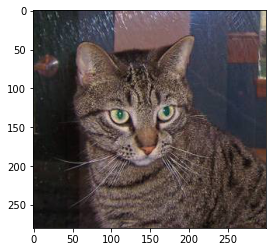

In [12]:
plt.imshow(cat_image)

In [13]:
os.listdir(train_path+'dogs')[0]

'dog.1.jpg'

In [14]:
dog_im = train_path+'\\dogs' + '\\dog.1.jpg'

In [15]:
dog_image = imread(dog_im)

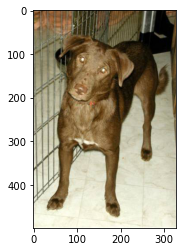

In [16]:
plt.imshow(dog_image)

#### Checking how many images are there.

In [17]:
len(os.listdir(train_path+'\\cats'))

4000

In [18]:
len(os.listdir(train_path+'\\dogs'))

4000

In [41]:
image_shape = (150,150,3)

# Preparing the data for the model

### Image Manipulation

#### Image manipulation makes sure the model is more robust to images that are not present in our dataset and one way to do this is by using ImageDataGenerator.

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
image_gen = ImageDataGenerator(rotation_range=20, # rotates the image 20 degrees
                               rescale=1/255, # Rescales the image by normalzing it.
                               zoom_range=0.1, # Zooming in by 10% 
                               horizontal_flip=True, # Allows horizontal flipping
                               fill_mode='nearest' # Fills in missing pixels with the nearest filled value
                              )

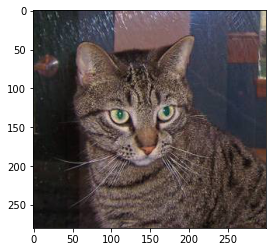

In [44]:
plt.imshow(cat_image)

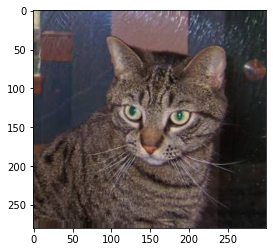

In [45]:
plt.imshow(image_gen.random_transform(cat_image))

### Generating many manipulated images from a directory

In [46]:
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [47]:
image_gen.flow_from_directory(test_path)

Found 2000 images belonging to 2 classes.


# Creating the Model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [49]:
model = Sequential()

# FIRST SET OF LAYERS

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# SECOND SET OF LAYERS

# Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# THIRD SET OF LAYERS

# Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTENS THE IMAGES FROM 150 by 150 to 22,500 BEFORE THE FINAL LAYER
model.add(Flatten())

# HIDDEN LAYER
model.add(Dense(128,activation='relu'))

# LAST LAYER IS THE CLASSIFIER AND THERE ARE TWO POSSIBLE OUTCOMES. HENCE 2 NEURONS. A SIGMOID ACTIVATION FUNCTION CAN ALSO
# BE USED FOR THIS AND WILL HAVE 1 NEURON IN THE OUTPUT LAYER.
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

# Early stopping is used to stop the training once the loss starts to increase (or when validation accuracy decreases).

# Training the Model

In [53]:
batch_size = 16

In [54]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [55]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 2000 images belonging to 2 classes.


In [56]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [57]:
results = model.fit_generator(train_image_gen,epochs=25,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/25
500/500 [==============================] - 321s 643ms/step - loss: 0.6601 - accuracy: 0.6034 - val_loss: 0.6396 - val_accuracy: 0.6555
Epoch 2/25
500/500 [==============================] - 316s 632ms/step - loss: 0.6269 - accuracy: 0.6488 - val_loss: 0.6231 - val_accuracy: 0.6675
Epoch 3/25
500/500 [==============================] - 314s 628ms/step - loss: 0.5875 - accuracy: 0.6948 - val_loss: 0.5497 - val_accuracy: 0.7225
Epoch 4/25
500/500 [==============================] - 313s 626ms/step - loss: 0.5594 - accuracy: 0.7080 - val_loss: 0.5702 - val_accuracy: 0.7035
Epoch 5/25
500/500 [==============================] - 549s 1s/step - loss: 0.5275 - accuracy: 0.7368 - val_loss: 0.5386 - val_accuracy: 0.7350
Epoch 6/25
500/500 [==============================] - 472s 943ms/step - loss: 0.5000 - accuracy: 0.7570 - val_loss: 0.4951 - val_accuracy: 0.7540
Epoch 7/25
500/500 [==============================] - 374s 747ms/step - loss: 0.4759 - accuracy: 0.7701 - val_loss: 0.4897 - va

# Model Evaluation

In [58]:
losses = pd.DataFrame(model.history.history)

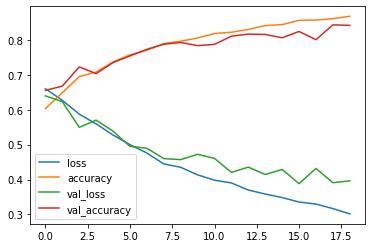

In [59]:
losses.plot()

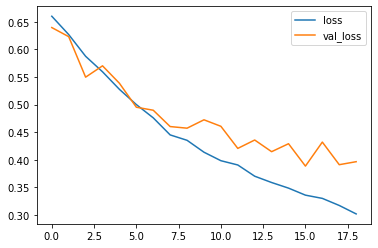

In [60]:
losses[['loss','val_loss']].plot()

In [62]:
from tensorflow.keras.preprocessing import image

In [65]:
predictions = model.predict_classes(test_image_gen)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(test_image_gen.classes,predictions))
confusion_matrix(test_image_gen.classes,predictions)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.83      0.84      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



array([[829, 171],
       [158, 842]], dtype=int64)

# Predicting on Images

#### Predicting for an image from the Test Set 

In [83]:
os.listdir(test_path+'\\cats')[0]

'cat.4001.jpg'

In [84]:
ct_im = test_path+'\\cats'+ '\\cat.4001.jpg'

In [85]:
cat_test = imread(ct_im)

In [87]:
ct_im

'C:\\Users\\Admin\\Downloads\\dataset\\test\\\\cats\\cat.4001.jpg'

In [88]:
my_image2 = image.load_img(ct_im,target_size=image_shape)

In [89]:
my_image2 = image.img_to_array(my_image2)

In [90]:
my_image2 = np.expand_dims(my_image2, axis=0)

In [91]:
# 1 ----> one image
# 150----> image width
# 150----> image height
# 3-------> color channels. Here it is 3 as it is an RGB image.
my_image2.shape

(1, 150, 150, 3)

In [92]:
model.predict_classes(my_image2)

#The model correctly predicts that the image belongs to class 0 which is a cat.

array([0], dtype=int64)